In [210]:
import sys
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants
import os
import bigbadbrain as bbb
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy
from scipy.ndimage.filters import gaussian_filter
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d

from skimage.filters import threshold_triangle
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages')
import os
import statsmodels.api as sm
import cv2
import matplotlib.patches as mpatches
import psutil
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib.colors import Normalize


%matplotlib inline
plt.rcParams.update({'font.size': 20})

from sklearn.feature_extraction.image import grid_to_graph
from mpl_toolkits.axes_grid1 import ImageGrid
import json
from matplotlib.ticker import FuncFormatter

import nibabel as nib

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import itertools
import random
from scipy.cluster import hierarchy
import matplotlib as mpl
from matplotlib.pyplot import cm

from scipy.interpolate import UnivariateSpline
from sklearn.linear_model import LinearRegression

from scipy.fftpack import fft,fftshift,ifft

In [308]:
#####################
### Load Clusters ###
#####################
n_clusters = 2000
labels_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20201129_super_slices/final_9_cluster_labels_2000.npy'
cluster_model_labels = np.load(labels_file) #z,t

In [282]:
n_clusters = 2000
labels_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20201129_super_slices/cluster_labels.npy'
cluster_model_labels = np.load(labels_file)

In [283]:
main_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20201221_neural_weighted_behavior/"

response_files = [os.path.join(main_path, file) for file in os.listdir(main_path) if 'responses' in file]
bbb.sort_nicely(response_files)

responses = []
for file in response_files:
    responses.append(np.load(file))
responses = np.asarray(responses)

responses_split = np.reshape(responses, (49,2000,3,500))
responses_fft = fft(responses_split,axis=-1)
responses_fft[:,:,:,15:23] = 0
responses_fft[:,:,:,475:485] = 0
responses_filtered = ifft(responses_fft,axis=-1)
responses_filtered.shape

cluster_id = np.argmax(np.sum(responses_filtered[20,:,0,:].real, axis=1))

In [284]:
cluster_id

319

In [285]:
responses_filtered.shape

(49, 2000, 3, 500)

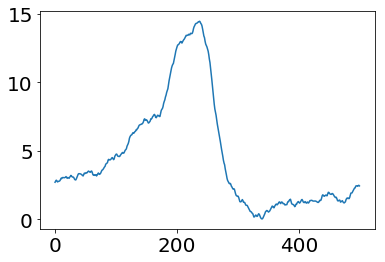

In [286]:
plt.plot(responses_filtered[20,cluster_id,0,:])

In [309]:
maps = []
for z in range(49):
    print(z)
    load_file = f'/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210111_bout_triggered/xss_{z}.npy'
    xss = np.load(load_file)
    load_file = f'/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210111_bout_triggered/yss_{z}.npy'
    yss = np.load(load_file)
    #load_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210111_bout_triggered/behavior_20.npy'
    #behavior = np.load(load_file)

    before = 3000 #in ms
    after = 3000 # in ms
    before = int(before/10) # now everything is in units of 10ms
    after = int(after/10)
    neural_bin_size = 50
    neural_bins = np.arange(-before*10,after*10,neural_bin_size)
    responses = []
    for cluster_num in range(n_clusters):
        bin_id = np.digitize(xss[cluster_num,:,:].ravel(), neural_bins)
        avgs = []
        for i in range(len(neural_bins)):
            avgs.append(np.mean(yss[cluster_num,:,:].ravel()[np.where(bin_id==i)[0]]))
        responses.append(avgs)
    responses = np.asarray(responses)

    colored_by_betas = np.zeros((256*128,120))
    for cluster_num in range(n_clusters):
        cluster_indicies = np.where(cluster_model_labels[z,:]==cluster_num)[0]
        colored_by_betas[cluster_indicies,:] = responses[cluster_num,:]
    colored_by_betas = colored_by_betas.reshape(256,128,120)
    maps.append(colored_by_betas)
    
maps = np.asarray(maps)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48


In [310]:
maps.shape

(49, 256, 128, 120)

In [ ]:
maps_smooth = scipy.ndimage.gaussian_filter1d(maps,axis=-1,sigma=2,truncate=1)

In [338]:
responses_fft = fft(np.nan_to_num(maps_smooth),axis=-1)
responses_fft[:,:,:,5:25] = 0
responses_fft[:,:,:,120-25:120-5] = 0
responses_filtered = ifft(responses_fft,axis=-1)
responses_filtered.shape

(49, 256, 128, 120)

In [339]:
max_map = np.max(np.real(responses_filtered),axis=0)

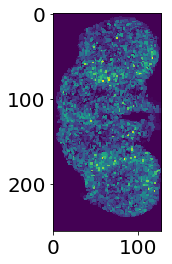

In [341]:
plt.imshow(max_map[:,:,60])

In [342]:
save_file = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210111_bout_triggered/tempmap3"
nib.Nifti1Image(max_map, np.eye(4)).to_filename(save_file)

In [ ]:
# notched 10 units before, with 20ms res, so 200ms
# here, with 50ms res, 200ms is 4 units

In [ ]:
#peak notch before was 20 in, 

In [311]:
maps_smooth = scipy.ndimage.gaussian_filter1d(maps,axis=-1,sigma=2,truncate=1)
out = np.reshape(np.nan_to_num(maps_smooth),(-1,120))[705582,:]

In [331]:
maps_smooth.shape

(49, 256, 128, 120)

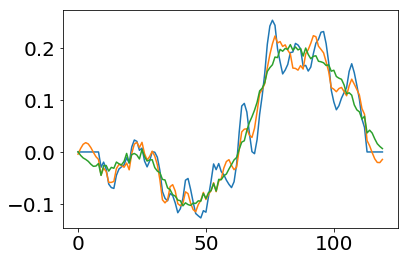

In [330]:
plt.plot(out)
plt.plot(filtered)
plt.plot(filtered_heavy)

In [320]:
f = fft(out)
f[10:13] = 0
f[120-13:120-10] = 0
filtered = ifft(f)

In [329]:
f = fft(out)
f[5:25] = 0
f[120-25:120-5] = 0
filtered_heavy = ifft(f)

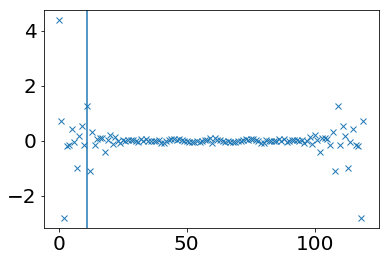

In [319]:
plt.plot(f,'x')
plt.axvline(11)

In [299]:
load_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210111_bout_triggered/yss_20.npy'
yss = np.load(load_file)
yss.shape

(2000, 498, 10)

In [301]:


yss = yss_master
xss = xss_master

before = 3000 #in ms
after = 3000 # in ms
before = int(before/10) # now everything is in units of 10ms
after = int(after/10)
neural_bin_size = 20
neural_bins = np.arange(-before*10,after*10,neural_bin_size)
responses = []
for cluster_num in [0]:
    bin_id = np.digitize(xss[cluster_num,:,:].ravel(), neural_bins)
    avgs = []
    for i in range(len(neural_bins)):
        avgs.append(np.mean(yss[cluster_num,:,:].ravel()[np.where(bin_id==i)[0]]))
    responses.append(avgs)
responses = np.asarray(responses)


In [302]:
responses.shape

(1, 300)

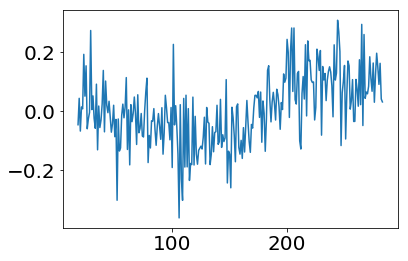

In [303]:
plt.plot(responses[0,:])

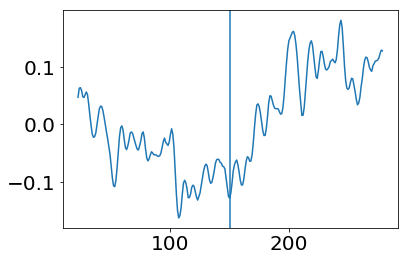

In [307]:
plt.plot(scipy.ndimage.gaussian_filter1d(responses[0,:],sigma=2,truncate=2))
plt.axvline(150)

In [288]:
maps = np.squeeze(maps)

In [277]:
maps.shape

(2000, 300)

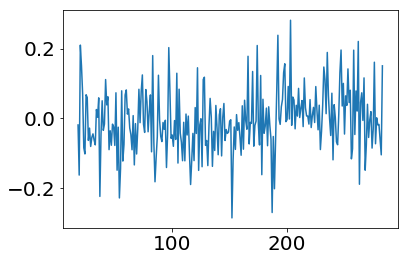

In [289]:
plt.plot(maps[319,:])

In [126]:
main_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20201221_neural_weighted_behavior/"

response_files = [os.path.join(main_path, file) for file in os.listdir(main_path) if 'responses' in file]
bbb.sort_nicely(response_files)

responses = []
for file in response_files:
    responses.append(np.load(file))
responses = np.asarray(responses)

responses_split = np.reshape(responses, (49,2000,3,500))
responses_fft = fft(responses_split,axis=-1)
responses_fft[:,:,:,15:23] = 0
responses_fft[:,:,:,475:485] = 0
responses_filtered = ifft(responses_fft,axis=-1)
responses_filtered.shape

cluster_id = np.argmax(np.sum(responses_filtered[20,:,0,:].real, axis=1))

60.0

In [ ]:
#neuweibeh time_shifts = list(range(-5000,5000,20)) # in ms
#triggered = (-3000,3000,50)

In [272]:
3000/50

60.0

In [271]:
500-15, 500-23

(485, 477)

In [260]:
xf.shape

(2400,)

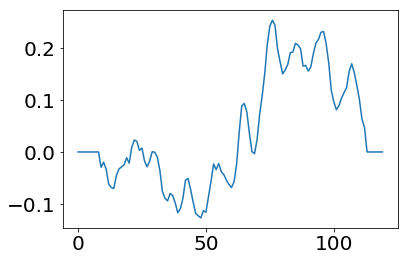

In [263]:
plt.plot(out)

In [265]:
6/20

0.3

In [266]:
20*6

120

Text(0.5, 0, 'Freq (Hz)')

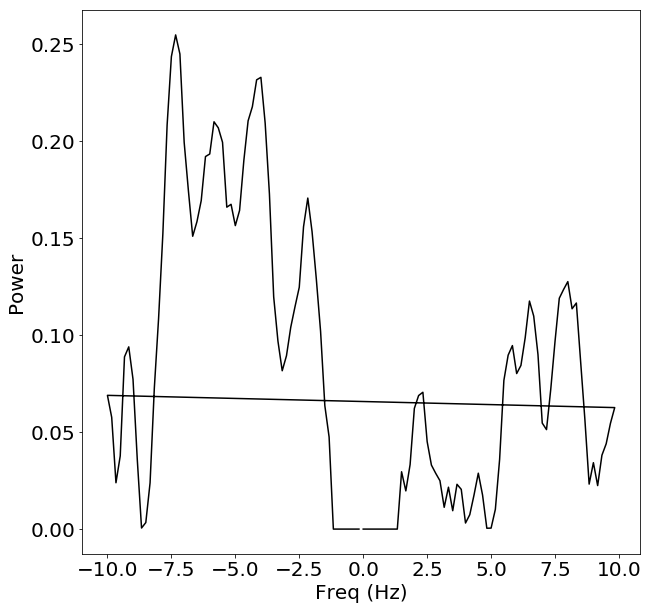

In [267]:
SAMPLE_RATE = 20 #in Hz
DURATION = 6 #in sec

N = SAMPLE_RATE * DURATION

yf = out
xf = scipy.fftpack.fftfreq(N, 1 / SAMPLE_RATE)

plt.figure(figsize=(10,10))
plt.plot(xf, np.abs(yf),color='k')
#plt.xlim(0,10)
#plt.axvline(1/0.531995701,color='r',linestyle='--')
plt.ylabel('Power')
plt.xlabel('Freq (Hz)')

In [258]:
1000/50

20.0

In [ ]:
# neuweighbehav filters have 500 timepoints of 

In [212]:
responses_fft = fft(maps_smooth,axis=-1)

In [214]:
responses_fft.shape

(49, 256, 128, 120)

In [217]:
np.reshape(np.nan_to_num(responses_fft),(-1,120))[705582,:]

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
      

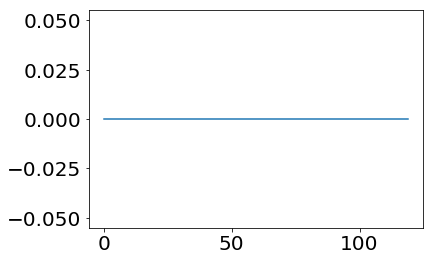

In [215]:
plt.plot()

In [211]:
maps_smooth.shape

(49, 256, 128, 120)

In [199]:
256*128*49

1605632

In [201]:
maps_smooth.shape

(49, 256, 128, 120)

In [207]:
120*50

6000

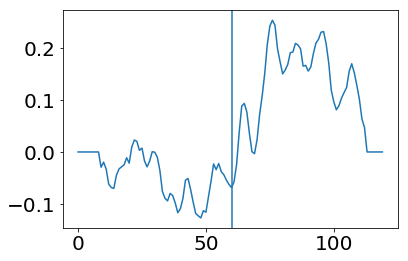

In [257]:
plt.plot(out)
plt.axvline(60)

In [227]:
out[10:13] = 0
out[120-10:120-13] = 0

In [268]:
f = fft(out)
f[10:13] = 0
f[120-13:120-10] = 0
filtered = ifft(f)

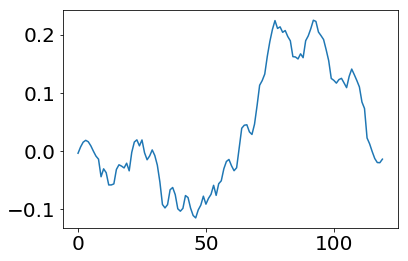

In [269]:
plt.plot(filtered)

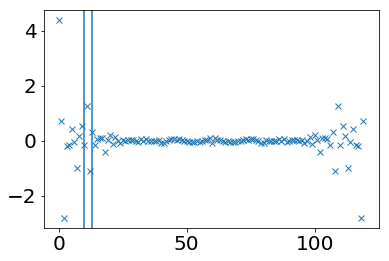

In [270]:
plt.plot(fft(out),'x')
plt.axvline(10)
plt.axvline(13)

In [196]:
np.argmax(np.sum(np.nan_to_num(maps_smooth),axis=-1))

705582

In [73]:
maps_smooth = maps_smooth-maps_smooth[:,:,:,50,np.newaxis]

In [109]:
maps_max = np.max(maps_smooth,axis=0)
maps_max.shape

(256, 128, 120)

In [97]:
maps_min = np.min(maps_smooth,axis=0)
maps_min.shape

(256, 128, 120)

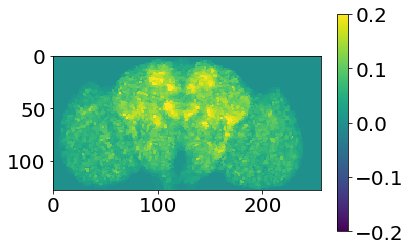

In [124]:
plt.imshow(maps_max[:,:,80].T,vmin=-.2,vmax=.2)
plt.colorbar()

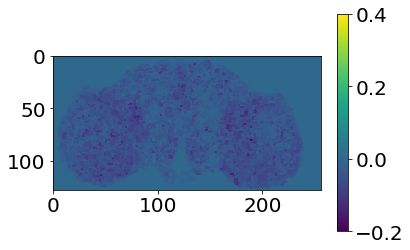

In [101]:
plt.imshow(maps_min[:,:,90].T,vmin=-.2,vmax=.4)
plt.colorbar()

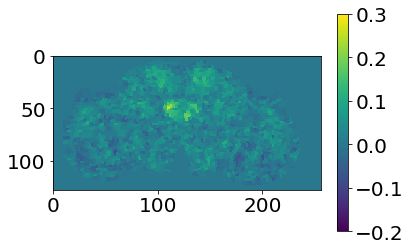

In [66]:
plt.imshow(maps_smooth[20,:,:,80].T,vmin=-.2,vmax=.3)
plt.colorbar()

In [125]:
save_file = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210111_bout_triggered/tempmap2"
nib.Nifti1Image(maps_max, np.eye(4)).to_filename(save_file)

In [2]:
fly_names = ['fly_087', 'fly_089', 'fly_094', 'fly_097', 'fly_098', 'fly_099', 'fly_100', 'fly_101', 'fly_105']

In [3]:
dataset_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset"

In [4]:
expt_len = 1000*30*60
resolution = 10
high_res_timepoints = np.arange(0,expt_len,resolution) #0 to last time at subsample res
z=20
behaviors = ['Y_pos', 'Y_neg', 'Z_pos', 'Z_neg']

# Load Neural Data

In [5]:
t0 = time.time()
brain_file = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20201110_analysis_superfly_supervoxels/superslice_20.nii"
brain = np.array(nib.load(brain_file).get_data(), copy=True)
print(f'Duration: {time.time()-t0}')

Duration: 13.813099145889282


In [6]:
anat_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates/luke.nii"
anatomy = np.array(nib.load(anat_path).get_data(), copy=True)

# Make clusters

In [7]:
def create_clusters(brain, n_clusters):
    t0 = time.time()
    clustering_dir = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20201110_analysis_superfly_supervoxels"
    super_to_cluster = brain.reshape(-1, 33840)
    connectivity = grid_to_graph(256,128)
    cluster_model = AgglomerativeClustering(n_clusters=n_clusters,
                                    memory=clustering_dir,
                                    linkage='ward',
                                    connectivity=connectivity)
    cluster_model.fit(super_to_cluster)
    print('Duration: {}'.format(time.time()-t0))
    return cluster_model

In [8]:
n_clusters = 2000
cluster_model = create_clusters(brain, n_clusters)

Duration: 54.75799345970154


# Build Flies

In [9]:
class Fly:
    def __init__ (self, fly_name, fly_idx):
        self.dir = os.path.join(dataset_path, fly_name, 'func_0')
        self.fly_idx = fly_idx
        self.fly_name = fly_name
        self.maps = {}
    def load_timestamps (self):
        self.timestamps = bbb.load_timestamps(os.path.join(self.dir, 'imaging'))
    def load_fictrac (self):
        self.fictrac = Fictrac(self.dir, self.timestamps)
    def load_brain_slice (self):
        self.brain = brain[:,:,:,self.fly_idx]
    def load_anatomy (self):
        to_load = os.path.join(dataset_path, self.fly_name, 'warp', 'anat-to-meanbrain.nii')
        self.anatomy = np.array(nib.load(to_load).get_data(), copy=True)
    def get_cluster_averages (self, cluster_model, n_clusters):
        neural_data = self.brain.reshape(-1, 3384)
        signals = []
        self.cluster_indicies = []
        for cluster_num in range(n_clusters):
            cluster_indicies = np.where(cluster_model.labels_==cluster_num)[0]
            mean_signal = np.mean(neural_data[cluster_indicies,:], axis=0)
            signals.append(mean_signal)
            self.cluster_indicies.append(cluster_indicies) # store for later
        self.cluster_signals=np.asarray(signals)
    def make_corr_map (self, n_clusters, cluster_model, behavior):
        corrs = []
        # remove zeros from correlation
        behavior_vector = flies[fly].fictrac.fictrac[behavior]
        non_zero_entries = np.where(behavior_vector != 0)[0]
        for i in range(n_clusters):
            cluster_indicies = np.where(cluster_model.labels_==i)[0]
            if len(cluster_indicies) > 2000:
                corrs.append(0)
            else:
                corrs.append(scipy.stats.pearsonr(behavior_vector[non_zero_entries],
                                                  self.cluster_signals[i,non_zero_entries])[0])
        colored_by_betas = np.zeros(256*128)
        for cluster_num in range(n_clusters):
            cluster_indicies = np.where(cluster_model.labels_==cluster_num)[0]
            colored_by_betas[cluster_indicies] = corrs[cluster_num]
        colored_by_betas = colored_by_betas.reshape(256,128)
        self.maps[behavior] = colored_by_betas
    def get_cluster_id (self, x, y):
        ax_vec = x*128 + y
        for i in range(n_clusters):
            if ax_vec in self.cluster_indicies[i]:
                cluster_id = i
                break
        return cluster_id

In [ ]:
class Fictrac:
    def __init__ (self, fly_dir, timestamps):
        self.fictrac_raw = bbb.load_fictrac(os.path.join(fly_dir, 'fictrac'))
        self.timestamps = timestamps
    def make_interp_object(self, behavior):
        # Create camera timepoints
        fps=50
        camera_rate = 1/fps * 1000 # camera frame rate in ms
        expt_len = 1000*30*60
        x_original = np.arange(0,expt_len,camera_rate)

        # Smooth raw fictrac data
        fictrac_smoothed = scipy.signal.savgol_filter(np.asarray(self.fictrac_raw[behavior]),25,3)

        # Create interp object with camera timepoints
        fictrac_interp_object = interp1d(x_original, fictrac_smoothed, bounds_error = False)
        return fictrac_interp_object

    def pull_from_interp_object(self, interp_object, timepoints):
        new_interp = interp_object(timepoints)
        np.nan_to_num(new_interp, copy=False);
        return new_interp

    def interp_fictrac(self, z):
        behaviors = ['dRotLabY', 'dRotLabZ']; shorts = ['Y', 'Z']
        self.fictrac = {}

        for behavior, short in zip(behaviors, shorts):
            interp_object = self.make_interp_object(behavior)
            self.fictrac[short + 'i'] = interp_object

            ### Velocity ###
            low_res_behavior = self.pull_from_interp_object(interp_object, self.timestamps[:,z])
            self.fictrac[short] = low_res_behavior#/np.std(low_res_behavior)
            
            ### Clipped Velocities ###
            self.fictrac[short + '_pos'] = np.clip(self.fictrac[short], a_min=0, a_max=None)
            self.fictrac[short + '_neg'] = np.clip(self.fictrac[short], a_min=None, a_max=0)*-1
            
            ### Strongly Clipped Velocities ###
            # excludes points even close to 0
            #self.fictrac[short + '_pos_very'] = np.clip(self.fictrac[short], a_min=0.3, a_max=None)
            #self.fictrac[short + '_neg_very'] = np.clip(self.fictrac[short], a_min=None, a_max=-0.3)*-1

            ### Acceleration ###
            high_res_behavior = self.pull_from_interp_object(interp_object, high_res_timepoints)
            self.fictrac[short + 'h'] = high_res_behavior/np.std(high_res_behavior)

            accel = scipy.signal.savgol_filter(np.diff(high_res_behavior),25,3)
            accel = np.append(accel, 0)
            interp_object = interp1d(high_res_timepoints, accel, bounds_error = False)
            acl = interp_object(self.timestamps[:,z])
            acl[-1] = 0
            self.fictrac[short + 'a'] = acl#/np.std(acl)
            
            ### Clipped Acceleration ###
            self.fictrac[short + 'a' + '_pos'] = np.clip(self.fictrac[short + 'a'], a_min=0, a_max=None)
            self.fictrac[short + 'a' + '_neg'] = np.clip(self.fictrac[short + 'a'], a_min=None, a_max=0)*-1

        self.fictrac['YZ'] = np.sqrt(np.power(self.fictrac['Y'],2), np.power(self.fictrac['Z'],2))
        self.fictrac['YZh'] = np.sqrt(np.power(self.fictrac['Yh'],2), np.power(self.fictrac['Zh'],2))

In [ ]:
flies = {}
for i, fly in enumerate(fly_names):
    print('==={}==='.format(fly))
    flies[fly] = Fly(fly_name=fly, fly_idx=i)
    flies[fly].load_timestamps()
    flies[fly].load_fictrac()
    flies[fly].fictrac.interp_fictrac(z)
    flies[fly].load_brain_slice()
    flies[fly].load_anatomy()
    flies[fly].get_cluster_averages(cluster_model, n_clusters)

===fly_087===

~~ load_timestamps ~~
Trying to load timestamp data from hdf5 file.
Success.
load_timestamps done. Duration: 12.66 ms

~~ load_fictrac ~~
load_fictrac done. Duration: 3.37 sec
===fly_089===

~~ load_timestamps ~~
Trying to load timestamp data from hdf5 file.
Success.
load_timestamps done. Duration: 12.61 ms

~~ load_fictrac ~~
load_fictrac done. Duration: 3.46 sec
===fly_094===

~~ load_timestamps ~~
Trying to load timestamp data from hdf5 file.
Success.
load_timestamps done. Duration: 275.12 ms

~~ load_fictrac ~~
load_fictrac done. Duration: 3.63 sec
===fly_095===

~~ load_timestamps ~~
Trying to load timestamp data from hdf5 file.
Success.
load_timestamps done. Duration: 7.47 ms

~~ load_fictrac ~~
load_fictrac done. Duration: 3.46 sec


In [ ]:
### Pool behavior
not_clipped_behaviors = ['Y', 'Z', 'Ya', 'Za']
clipped_behaviors = ['Y_pos', 'Y_neg',
                     'Z_pos', 'Z_neg',
                     'Ya_pos', 'Ya_neg',
                     'Za_pos', 'Za_neg']
all_behaviors = not_clipped_behaviors + clipped_behaviors

pooled_behavior = {}
for j, behavior in enumerate(all_behaviors):
    pooled_behavior[behavior] = []
    for i,fly in enumerate(flies):
        pooled_behavior[behavior].append(flies[fly].fictrac.fictrac[behavior])
    pooled_behavior[behavior] = np.asarray(pooled_behavior[behavior]).flatten()

### Correct behavior stddev as a pooled group
stds = {}
for j, behavior in enumerate(not_clipped_behaviors):
    stds[behavior] = np.std(pooled_behavior[behavior])

for j, behavior in enumerate(all_behaviors):
    std_key = behavior.split('_')[0] # grab not split key
    for i,fly in enumerate(flies):
        flies[fly].fictrac.fictrac[behavior] = flies[fly].fictrac.fictrac[behavior]/stds[std_key]
    pooled_behavior[behavior] = pooled_behavior[behavior]/stds[std_key]

In [ ]:
def find_bouts(fly):
    expt_len = 1000*30*60
    resolution = 10
    high_res_timepoints = np.arange(0,expt_len,resolution) #0 to last time at subsample res

    behavior = 'Yh'

    B_THRESHOLD = np.std(flies[fly].fictrac.fictrac[behavior])/4
    ALIVE_TIME = 1000 # in ms
    DEAD_TIME = 1000 # in ms

    state = 'quiescent'
    up_streak = 0
    down_streak = 0
    BOUTS = []
    ALIVE_TIME = int(ALIVE_TIME/resolution)
    DEAD_TIME = int(DEAD_TIME/resolution)

    for i in range(len(flies[fly].fictrac.fictrac[behavior])):
        # If high behavior, reset down_streak, and add 1 to up_streak
        if flies[fly].fictrac.fictrac[behavior][i] > B_THRESHOLD:
            down_streak = 0
            up_streak += 1
        else:
            up_streak = 0
            down_streak += 1

        if state == 'quiescent':
            if up_streak >= ALIVE_TIME:
                state = 'moving'
                BOUTS.append({'start': i-ALIVE_TIME})
        elif state == 'moving':
            if down_streak >= DEAD_TIME:
                state = 'quiescent'
                BOUTS[-1]['end'] = i-DEAD_TIME
    BOUTS = [bout for bout in BOUTS if 'end' in bout]
    #print('Found {} bouts'.format(len(BOUTS)))

    ### Clean Start Bouts
    # remove bouts that have behavior too close *before* them
    before = 1000 # in ms
    before = int(before/10)
    start_bouts=[bout for bout in BOUTS if np.mean(np.abs(flies[fly].fictrac.fictrac[behavior][bout['start']-before:bout['start']])) < .2]
    #print('Remaining start_bouts post-cleaning: {}'.format(np.shape(start_bouts)[0]))

    ### Clean Stop Bouts
    # remove bouts that have behavior too close *after* them
    before = 1000 # in ms
    before = int(before/10)
    stop_bouts=[bout for bout in BOUTS if np.mean(np.abs(flies[fly].fictrac.fictrac[behavior][bout['end']:bout['end']+before])) < .2]
    #print('Remaining stop_bouts bouts post-cleaning: {}'.format(np.shape(stop_bouts)[0]))
    return start_bouts, stop_bouts

def bout_triggered(fly, neural_data, all_bouts, bout_type):
    if bout_type == 'start_bouts':
        align_to = 'start'
    elif bout_type == 'stop_bouts':
        align_to = 'end'
    before = 3000 #in ms
    after = 3000 # in ms
    jump = flies[fly].timestamps[1,0]-flies[fly].timestamps[0,0]
    num_neural_points = int(before/jump)

    before = int(before/10) # now everything is in units of 10ms
    after = int(after/10)
    bins = bbb.create_bins(10,before*10,after*10)[:-1]

    xss = []; yss = []
    for i in range(len(all_bouts[bout_type])):
        nearest = np.searchsorted(flies[fly].timestamps[:,z]/10, all_bouts[bout_type][i][align_to])
        offset = (flies[fly].timestamps[nearest,z]/10 - all_bouts[bout_type][i][align_to])*10
        xs = np.arange(offset-num_neural_points*jump,offset+num_neural_points*jump,jump)
        ys = neural_data[nearest-num_neural_points:nearest+num_neural_points]
        if len(ys) == 10:
            xss.append(xs); yss.append(ys)
    xss = np.asarray(xss); yss = np.asarray(yss)
    
    sum_bouts = [flies[fly].fictrac.fictrac['Yh'][bout[align_to]-before:bout[align_to]+after] for bout in all_bouts[bout_type]][1:-1]
    sum_bouts = np.asarray(sum_bouts)
    #avg_bout = np.mean(sum_bouts,axis=0)
    
    return xss, yss, sum_bouts
    
def plot_bout_triggered(xss, yss, behavior_trace, x_pos, y_pos):
    before = 3000 #in ms
    after = 3000 # in ms
    before = int(before/10) # now everything is in units of 10ms
    after = int(after/10)
    ax = fig.add_axes([x_pos,y_pos,.05,.05])
    plt.plot(xss,yss,marker=',',linestyle='',color='k') # for plotting individual neural points

    neural_bin_size = 50
    neural_bins = np.arange(-before*10,after*10,neural_bin_size)
    bin_id = np.digitize(xss.ravel(), neural_bins)
    avgs = []
    for i in range(len(neural_bins)):
        avgs.append(np.mean(yss.ravel()[np.where(bin_id==i)[0]]))
    plt.plot(neural_bins-0.5*neural_bin_size,avgs,linewidth=0.5,color='red')

    plt.axvline(0,linestyle='--',color='k',linewidth=0.5)
    #plt.xlabel('ms')
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    plt.axhline(0,linestyle='--',color='k',linewidth=0.5)
    plt.ylim(-1.5,2)
    #plt.xlim(-1000,1000)
    #plt.title(align_to,y=.85,backgroundcolor='white')

    # Plot behavior

    bins = bbb.create_bins(10,before*10,after*10)[:-1]
    plt.plot(bins,behavior_trace/3,color='blue',linewidth=0.5)

In [ ]:
# We will have a vector of timepoints of onsets
# 

# Start

In [290]:
z = 20
fly_names = ['fly_087', 'fly_089', 'fly_094', 'fly_097', 'fly_098', 'fly_099', 'fly_100', 'fly_101', 'fly_105']
dataset_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset"
expt_len = 1000*30*60
resolution = 10
high_res_timepoints = np.arange(0,expt_len,resolution) #0 to last time at subsample res

In [291]:
class Fly:
    def __init__ (self, fly_name, fly_idx):
        self.dir = os.path.join(dataset_path, fly_name, 'func_0')
        self.fly_idx = fly_idx
        self.fly_name = fly_name
        self.maps = {}
    def load_timestamps (self):
        self.timestamps = bbb.load_timestamps(os.path.join(self.dir, 'imaging'))
    def load_fictrac (self):
        self.fictrac = Fictrac(self.dir, self.timestamps)
    def load_brain_slice (self):
        self.brain = brain[:,:,:,self.fly_idx]
    def load_anatomy (self):
        to_load = os.path.join(dataset_path, self.fly_name, 'warp', 'anat-to-meanbrain.nii')
        self.anatomy = np.array(nib.load(to_load).get_data(), copy=True)
    def load_z_depth_correction (self):
        to_load = os.path.join(dataset_path, self.fly_name, 'warp', '20201220_warped_z_depth.nii')
        self.z_correction = np.array(nib.load(to_load).get_data(), copy=True)
    def get_cluster_averages (self, cluster_model_labels, n_clusters):
        neural_data = self.brain.reshape(-1, 3384)
        signals = []
        self.cluster_indicies = []
        for cluster_num in range(n_clusters):
            cluster_indicies = np.where(cluster_model_labels==cluster_num)[0]
            mean_signal = np.mean(neural_data[cluster_indicies,:], axis=0)
            signals.append(mean_signal)
            self.cluster_indicies.append(cluster_indicies) # store for later
        self.cluster_signals=np.asarray(signals)
    def get_cluster_id (self, x, y):
        ax_vec = x*128 + y
        for i in range(n_clusters):
            if ax_vec in self.cluster_indicies[i]:
                cluster_id = i
                break
        return cluster_id

class Fictrac:
    def __init__ (self, fly_dir, timestamps):
        self.fictrac_raw = bbb.load_fictrac(os.path.join(fly_dir, 'fictrac'))
        self.timestamps = timestamps
    def make_interp_object(self, behavior):
        # Create camera timepoints
        fps=50
        camera_rate = 1/fps * 1000 # camera frame rate in ms
        expt_len = 1000*30*60
        x_original = np.arange(0,expt_len,camera_rate)

        # Smooth raw fictrac data
        fictrac_smoothed = scipy.signal.savgol_filter(np.asarray(self.fictrac_raw[behavior]),25,3)

        # Create interp object with camera timepoints
        fictrac_interp_object = interp1d(x_original, fictrac_smoothed, bounds_error = False)
        return fictrac_interp_object

    def pull_from_interp_object(self, interp_object, timepoints):
        new_interp = interp_object(timepoints)
        np.nan_to_num(new_interp, copy=False);
        return new_interp

    def interp_fictrac(self, z):
        behaviors = ['dRotLabY', 'dRotLabZ']; shorts = ['Y', 'Z']
        self.fictrac = {}

        for behavior, short in zip(behaviors, shorts):
            interp_object = self.make_interp_object(behavior)
            self.fictrac[short + 'i'] = interp_object

            ### Velocity ###
            low_res_behavior = self.pull_from_interp_object(interp_object, self.timestamps[:,z])
            self.fictrac[short] = low_res_behavior#/np.std(low_res_behavior)

            ### Clipped Velocities ###
            self.fictrac[short + '_pos'] = np.clip(self.fictrac[short], a_min=0, a_max=None)
            self.fictrac[short + '_neg'] = np.clip(self.fictrac[short], a_min=None, a_max=0)*-1

            ### Strongly Clipped Velocities ###
            # excludes points even close to 0
            #self.fictrac[short + '_pos_very'] = np.clip(self.fictrac[short], a_min=0.3, a_max=None)
            #self.fictrac[short + '_neg_very'] = np.clip(self.fictrac[short], a_min=None, a_max=-0.3)*-1

            ### Acceleration ###
            high_res_behavior = self.pull_from_interp_object(interp_object, high_res_timepoints)
            self.fictrac[short + 'h'] = high_res_behavior/np.std(high_res_behavior)

            accel = scipy.signal.savgol_filter(np.diff(high_res_behavior),25,3)
            accel = np.append(accel, 0)
            interp_object = interp1d(high_res_timepoints, accel, bounds_error = False)
            acl = interp_object(self.timestamps[:,z])
            acl[-1] = 0
            self.fictrac[short + 'a'] = acl#/np.std(acl)

            ### Clipped Acceleration ###
            self.fictrac[short + 'a' + '_pos'] = np.clip(self.fictrac[short + 'a'], a_min=0, a_max=None)
            self.fictrac[short + 'a' + '_neg'] = np.clip(self.fictrac[short + 'a'], a_min=None, a_max=0)*-1

        self.fictrac['YZ'] = np.sqrt(np.power(self.fictrac['Y'],2), np.power(self.fictrac['Z'],2))
        self.fictrac['YZh'] = np.sqrt(np.power(self.fictrac['Yh'],2), np.power(self.fictrac['Zh'],2))

def find_bouts(fly):
    expt_len = 1000*30*60
    resolution = 10
    high_res_timepoints = np.arange(0,expt_len,resolution) #0 to last time at subsample res

    behavior = 'Yh'

    B_THRESHOLD = np.std(flies[fly].fictrac.fictrac[behavior])/4
    ALIVE_TIME = 1000 # in ms
    DEAD_TIME = 1000 # in ms

    state = 'quiescent'
    up_streak = 0
    down_streak = 0
    BOUTS = []
    ALIVE_TIME = int(ALIVE_TIME/resolution)
    DEAD_TIME = int(DEAD_TIME/resolution)

    for i in range(len(flies[fly].fictrac.fictrac[behavior])):
        # If high behavior, reset down_streak, and add 1 to up_streak
        if flies[fly].fictrac.fictrac[behavior][i] > B_THRESHOLD:
            down_streak = 0
            up_streak += 1
        else:
            up_streak = 0
            down_streak += 1

        if state == 'quiescent':
            if up_streak >= ALIVE_TIME:
                state = 'moving'
                BOUTS.append({'start': i-ALIVE_TIME})
        elif state == 'moving':
            if down_streak >= DEAD_TIME:
                state = 'quiescent'
                BOUTS[-1]['end'] = i-DEAD_TIME
    BOUTS = [bout for bout in BOUTS if 'end' in bout]
    #print('Found {} bouts'.format(len(BOUTS)))

    ### Clean Start Bouts
    # remove bouts that have behavior too close *before* them
    before = 1000 # in ms
    before = int(before/10)
    start_bouts=[bout for bout in BOUTS if np.mean(np.abs(flies[fly].fictrac.fictrac[behavior][bout['start']-before:bout['start']])) < .2]
    #print('Remaining start_bouts post-cleaning: {}'.format(np.shape(start_bouts)[0]))

    ### Clean Stop Bouts
    # remove bouts that have behavior too close *after* them
    before = 1000 # in ms
    before = int(before/10)
    stop_bouts=[bout for bout in BOUTS if np.mean(np.abs(flies[fly].fictrac.fictrac[behavior][bout['end']:bout['end']+before])) < .2]
    #print('Remaining stop_bouts bouts post-cleaning: {}'.format(np.shape(stop_bouts)[0]))
    return start_bouts, stop_bouts

def bout_triggered(fly, neural_data, all_bouts, bout_type, original_z):
    if bout_type == 'start_bouts':
        align_to = 'start'
    elif bout_type == 'stop_bouts':
        align_to = 'end'
    before = 3000 #in ms
    after = 3000 # in ms
    jump = flies[fly].timestamps[1,0]-flies[fly].timestamps[0,0]
    num_neural_points = int(before/jump)

    before = int(before/10) # now everything is in units of 10ms
    after = int(after/10)
    bins = bbb.create_bins(10,before*10,after*10)[:-1]

    xss = []; yss = []
    for i in range(len(all_bouts[bout_type])):
        nearest = np.searchsorted(flies[fly].timestamps[:,original_z]/10, all_bouts[bout_type][i][align_to])
        offset = (flies[fly].timestamps[nearest,original_z]/10 - all_bouts[bout_type][i][align_to])*10
        xs = np.arange(offset-num_neural_points*jump,offset+num_neural_points*jump,jump)
        ys = neural_data[nearest-num_neural_points:nearest+num_neural_points]
        if len(ys) == 10:
            xss.append(xs); yss.append(ys)
    xss = np.asarray(xss); yss = np.asarray(yss)

    sum_bouts = [flies[fly].fictrac.fictrac['Yh'][bout[align_to]-before:bout[align_to]+after] for bout in all_bouts[bout_type]]#[1:-1]
    sum_bouts = np.asarray(sum_bouts)
    #avg_bout = np.mean(sum_bouts,axis=0)

    return xss, yss, sum_bouts

In [292]:
#######################
### Load Superslice ###
#######################
brain_file = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20201129_super_slices/superslice_{}.nii".format(z) #<---------- !!!
brain = np.array(nib.load(brain_file).get_data(), copy=True)
fly_idx_delete = 3 #(fly_095)
brain = np.delete(brain, fly_idx_delete, axis=-1) #### DELETING FLY_095 ####

In [129]:
#####################
### Load Clusters ###
#####################
n_clusters = 2000
labels_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20201129_super_slices/final_9_cluster_labels_2000.npy'
cluster_model_labels = np.load(labels_file) #z,t
cluster_model_labels = cluster_model_labels[z,:]

In [293]:
n_clusters = 2000
labels_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20201129_super_slices/cluster_labels.npy'
cluster_model_labels = np.load(labels_file)
cluster_model_labels = cluster_model_labels[z,:]

In [294]:
###################
### Build Flies ###
###################
flies = {}
for i, fly in enumerate(fly_names):
    flies[fly] = Fly(fly_name=fly, fly_idx=i)
    flies[fly].load_timestamps()
    flies[fly].load_fictrac()
    flies[fly].fictrac.interp_fictrac(z)
    flies[fly].load_brain_slice()
    flies[fly].load_z_depth_correction()
    flies[fly].get_cluster_averages(cluster_model_labels, n_clusters)


~~ load_timestamps ~~
Trying to load timestamp data from hdf5 file.
Success.
load_timestamps done. Duration: 74.23 ms

~~ load_fictrac ~~
load_fictrac done. Duration: 4.39 sec

~~ load_timestamps ~~
Trying to load timestamp data from hdf5 file.
Success.
load_timestamps done. Duration: 68.70 ms

~~ load_fictrac ~~
load_fictrac done. Duration: 3.05 sec

~~ load_timestamps ~~
Trying to load timestamp data from hdf5 file.
Success.
load_timestamps done. Duration: 43.70 ms

~~ load_fictrac ~~
load_fictrac done. Duration: 3.07 sec

~~ load_timestamps ~~
Trying to load timestamp data from hdf5 file.
Success.
load_timestamps done. Duration: 127.36 ms

~~ load_fictrac ~~
load_fictrac done. Duration: 3.78 sec

~~ load_timestamps ~~
Trying to load timestamp data from hdf5 file.
Success.
load_timestamps done. Duration: 60.23 ms

~~ load_fictrac ~~
load_fictrac done. Duration: 3.31 sec

~~ load_timestamps ~~
Trying to load timestamp data from hdf5 file.
Success.
load_timestamps done. Duration: 58.7

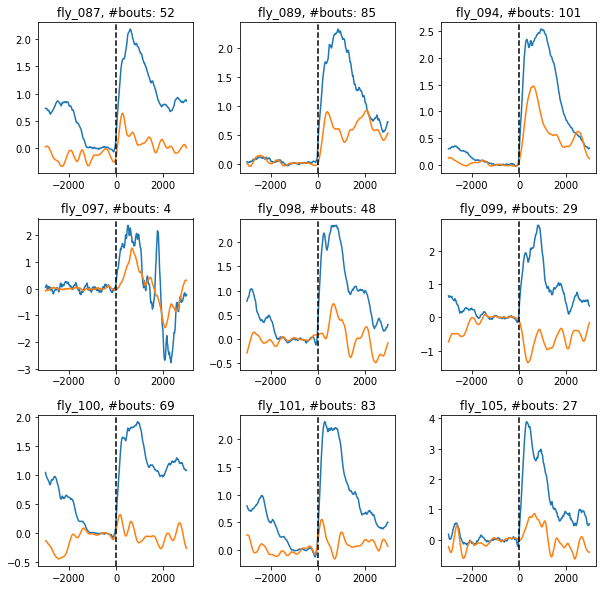

In [161]:
align_to = 'start'
bout_type = 'start_bouts'
#fig = plt.figure(figsize=(10,10))
#grid = ImageGrid(fig, 111, nrows_ncols=(3, 3), axes_pad=.05)
xs = np.arange(-3000,3000,10)

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
pooled_bouts = {'fwd_bouts': np.empty((0,600)), 'rot_bouts': np.empty((0,600))}

for fly, ax in zip(fly_names,axs.flat):
    start_bouts, stop_bouts = find_bouts(fly)
    all_bouts = {'start_bouts': start_bouts, 'stop_bouts': stop_bouts}

    forward_bouts = [flies[fly].fictrac.fictrac['Yh'][bout[align_to]-before:bout[align_to]+after] for bout in all_bouts[bout_type]]#[1:-1]
    forward_bouts = np.asarray(forward_bouts)
    pooled_bouts['fwd_bouts'] = np.vstack((pooled_bouts['fwd_bouts'], forward_bouts))
    num_bouts = forward_bouts.shape[0]
    forward_bouts = np.mean(forward_bouts,axis=0)

    rot_bouts = [flies[fly].fictrac.fictrac['Zh'][bout[align_to]-before:bout[align_to]+after] for bout in all_bouts[bout_type]]#[1:-1]
    rot_bouts = np.asarray(rot_bouts)
    pooled_bouts['rot_bouts'] = np.vstack((pooled_bouts['rot_bouts'], rot_bouts))
    rot_bouts = np.mean(rot_bouts,axis=0)
    
    ax.plot(xs,forward_bouts)
    ax.plot(xs,rot_bouts)
    ax.set_title('{}, #bouts: {}'.format(fly, num_bouts),fontsize=12)
    ax.axvline(0,color='k',linestyle='--')
    ax.tick_params(axis='both', which='major', labelsize=10)
    
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, f'{timestr}')
#plt.savefig(fname,dpi=300,bbox_inches='tight')

In [164]:
pooled_bouts['fwd_bouts'].shape

(498, 600)

In [181]:
np.random.randint(0,255,1)/255

array([0.0745098])

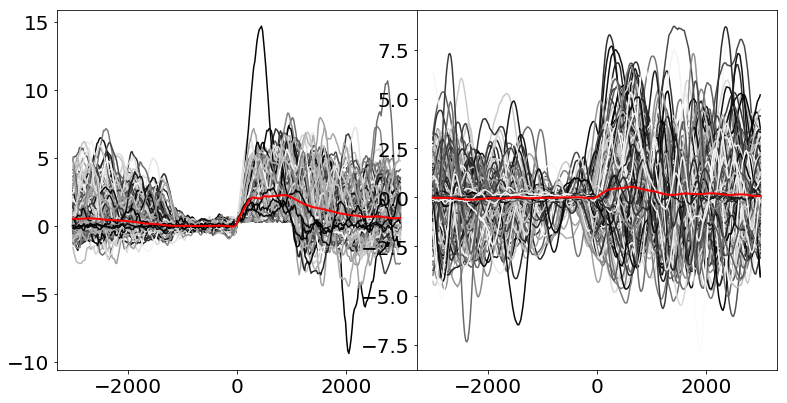

In [191]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0,0,.5,.5])
for i in range(498):
    ax.plot(xs, pooled_bouts['fwd_bouts'][i,:],color=str(float(np.random.randint(0,255,1)/255)))
ax.plot(xs, np.mean(pooled_bouts['fwd_bouts'],axis=0),linewidth=2,color='r')

ax = fig.add_axes([.5,0,.5,.5])
for i in range(498):
    ax.plot(xs, pooled_bouts['rot_bouts'][i,:],color=str(float(np.random.randint(0,255,1)/255)))
ax.plot(xs, np.mean(pooled_bouts['rot_bouts'],axis=0),linewidth=2,color='r')

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, f'{timestr}')
plt.savefig(fname,dpi=300,bbox_inches='tight')

In [295]:
#################
### Main Loop ###
#################
xss_master = []; yss_master = []; sum_bouts_master = []
for cluster_num in [319]:
    print(str(cluster_num))

    # loop over flies
    bout_type = 'start_bouts'
    pooled_bouts = {'xss': np.empty((0,10)), 'yss': np.empty((0,10)), 'sum_bouts': np.empty((0,600))}
    for fly in fly_names:
        # Get bout times
        start_bouts, stop_bouts = find_bouts(fly)
        all_bouts = {'start_bouts': start_bouts, 'stop_bouts': stop_bouts}
        neural_data = flies[fly].cluster_signals[cluster_num, :]

        # Get original_Z
        cluster_indicies = flies[fly].cluster_indicies[cluster_num]
        z_map = flies[fly].z_correction[:,:,z].ravel()
        original_z = int(np.median(z_map[cluster_indicies]))

        # Get bout triggered neural vectors
        xss, yss, sum_bouts = bout_triggered(fly, neural_data, all_bouts, bout_type, original_z)

        # Collect output from all flies
        pooled_bouts['xss'] = np.vstack((pooled_bouts['xss'], xss))
        pooled_bouts['yss'] = np.vstack((pooled_bouts['yss'], yss))
        pooled_bouts['sum_bouts'] = np.vstack((pooled_bouts['sum_bouts'], sum_bouts))
    # Collect output from all supervoxels
    xss_master.append(pooled_bouts['xss'])
    yss_master.append(pooled_bouts['yss'])
    sum_bouts_master.append(pooled_bouts['sum_bouts'])
    
xss_master = np.asarray(xss_master)
yss_master = np.asarray(yss_master)
sum_bouts_master = np.asarray(sum_bouts_master)

319


In [297]:
yss_master.shape

(1, 498, 10)

In [17]:
xss_master.shape #cluster_num, bout_num, temporal_datapoints

(10, 498, 10)

In [30]:
yss_master.shape

(10, 498, 10)

In [28]:
sum_bouts_master.shape

(10, 498, 600)

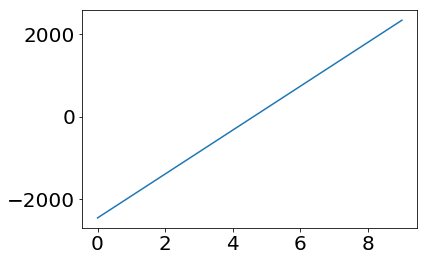

In [32]:
plt.plot(xss_master[0,100,:])

In [36]:
load_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210111_bout_triggered/xss_20.npy'
xss = np.load(load_file)
load_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210111_bout_triggered/yss_20.npy'
yss = np.load(load_file)
load_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210111_bout_triggered/behavior_20.npy'
behavior = np.load(load_file)

In [35]:
xss.shape

(2000, 498, 10)

In [42]:
xss[0,:,:].ravel().shape

(4980,)

In [40]:
xss[0,1,:]

array([-2216.516208, -1684.520507, -1152.524806,  -620.529105,
         -88.533404,   443.462297,   975.457998,  1507.453699,
        2039.4494  ,  2571.445101])

In [37]:
behavior.shape

(1, 480, 600)

In [38]:
yss.shape

(2000, 498, 10)

In [48]:
cluster_num = 318

In [52]:
yss.ravel().shape

(9960000,)

In [53]:
bin_id

array([ 13,  24,  34, ...,  88,  99, 110])

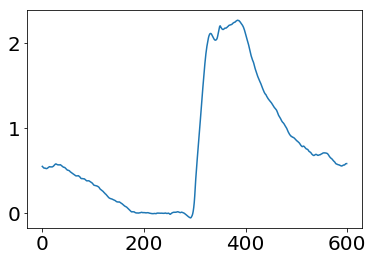

In [61]:
plt.plot(np.mean(behavior[0,:,:],axis=0))

In [63]:
behavior_trace = np.mean(behavior[0,:,:],axis=0)

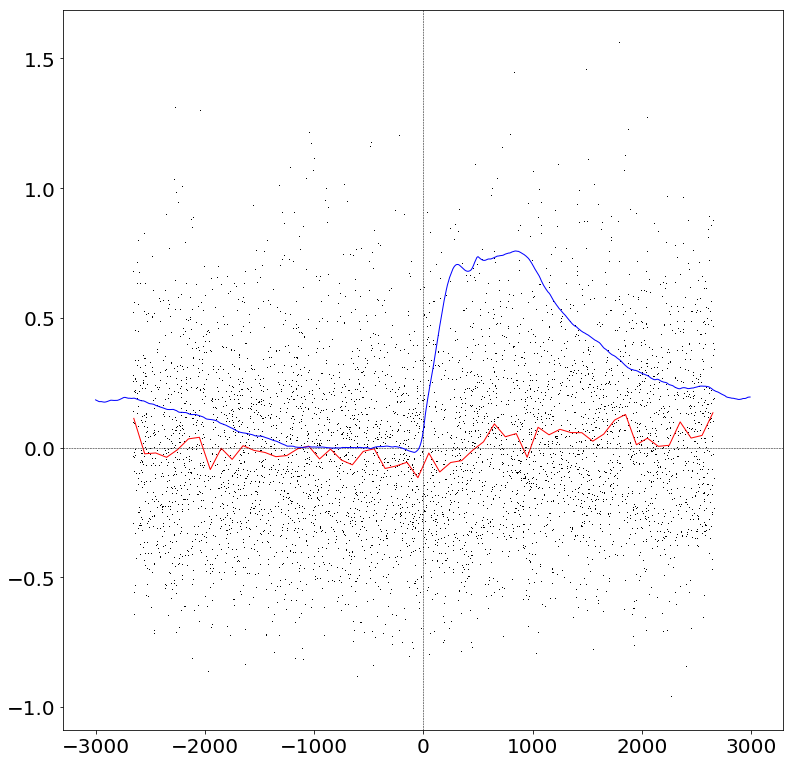

In [82]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([1,1,1,1])

before = 3000 #in ms
after = 3000 # in ms
before = int(before/10) # now everything is in units of 10ms
after = int(after/10)
plt.plot(xss[cluster_num,:,:].ravel(),yss[cluster_num,:,:].ravel(),marker=',',linestyle='',color='k') # for plotting individual neural points

neural_bin_size = 100
neural_bins = np.arange(-before*10,after*10,neural_bin_size)
bin_id = np.digitize(xss[cluster_num,:,:].ravel(), neural_bins)
avgs = []
for i in range(len(neural_bins)):
    avgs.append(np.mean(yss[cluster_num,:,:].ravel()[np.where(bin_id==i)[0]]))
plt.plot(neural_bins-0.5*neural_bin_size,avgs,linewidth=1,color='red')

plt.axvline(0,linestyle='--',color='k',linewidth=0.5)
#plt.xlabel('ms')
# ax.yaxis.set_visible(False)
# ax.xaxis.set_visible(False)
plt.axhline(0,linestyle='--',color='k',linewidth=0.5)
# plt.ylim(-1.5,2)
# #plt.xlim(-1000,1000)
# #plt.title(align_to,y=.85,backgroundcolor='white')

# # Plot behavior

bins = bbb.create_bins(10,before*10,after*10)[:-1]
plt.plot(bins,behavior_trace/3,color='blue',linewidth=1)

In [68]:
neural_bin_size = 50
neural_bins = np.arange(-before*10,after*10,neural_bin_size)
responses = []
for cluster_num in range(2000):
    bin_id = np.digitize(xss[cluster_num,:,:].ravel(), neural_bins)
    avgs = []
    for i in range(len(neural_bins)):
        avgs.append(np.mean(yss[cluster_num,:,:].ravel()[np.where(bin_id==i)[0]]))
    responses.append(avgs)
    #plt.plot(neural_bins-0.5*neural_bin_size,avgs,linewidth=1,color='red')

In [69]:
responses = np.asarray(responses)

In [70]:
responses.shape

(2000, 120)

In [75]:
cluster_model_labels.shape

(32768,)

In [76]:


colored_by_betas = np.zeros((256*128,120))
for cluster_num in range(n_clusters):
    cluster_indicies = np.where(cluster_model_labels[:]==cluster_num)[0]
    colored_by_betas[cluster_indicies,:] = responses[cluster_num,:]
colored_by_betas = colored_by_betas.reshape(256,128,120)


In [77]:
colored_by_betas.shape

(256, 128, 120)

In [80]:
save_file = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210111_bout_triggered/tempmap"
nib.Nifti1Image(colored_by_betas, np.eye(4)).to_filename(save_file)

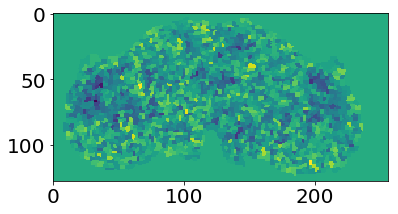

In [79]:
plt.imshow(colored_by_betas[:,:,60].T)

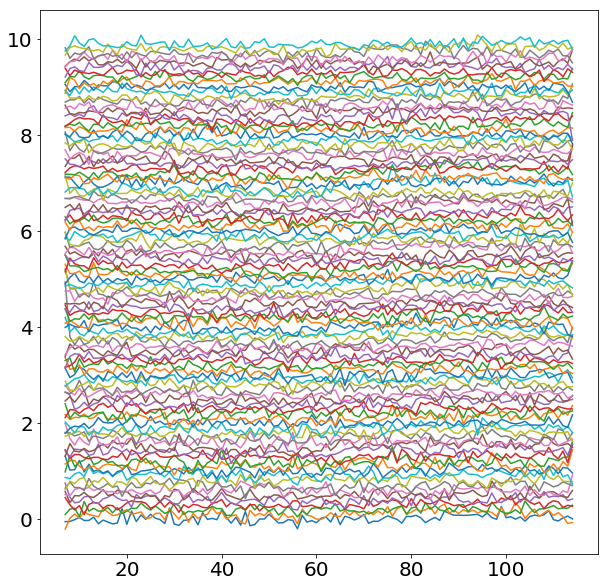

In [74]:
fig = plt.figure(figsize=(10,10))
#ax = fig.add_axes([1,1,1,1])

for i in range(100):
    plt.plot(responses[i,:]+i*.1)

In [ ]:
def plot_bout_triggered(xss, yss, behavior_trace, x_pos, y_pos):
    before = 3000 #in ms
    after = 3000 # in ms
    before = int(before/10) # now everything is in units of 10ms
    after = int(after/10)
    ax = fig.add_axes([x_pos,y_pos,.05,.05])
    plt.plot(xss,yss,marker=',',linestyle='',color='k') # for plotting individual neural points

    neural_bin_size = 50
    neural_bins = np.arange(-before*10,after*10,neural_bin_size)
    bin_id = np.digitize(xss.ravel(), neural_bins)
    avgs = []
    for i in range(len(neural_bins)):
        avgs.append(np.mean(yss.ravel()[np.where(bin_id==i)[0]]))
    plt.plot(neural_bins-0.5*neural_bin_size,avgs,linewidth=0.5,color='red')

    plt.axvline(0,linestyle='--',color='k',linewidth=0.5)
    #plt.xlabel('ms')
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    plt.axhline(0,linestyle='--',color='k',linewidth=0.5)
    plt.ylim(-1.5,2)
    #plt.xlim(-1000,1000)
    #plt.title(align_to,y=.85,backgroundcolor='white')

    # Plot behavior

    bins = bbb.create_bins(10,before*10,after*10)[:-1]
    plt.plot(bins,behavior_trace/3,color='blue',linewidth=0.5)